# Import libraries

In [42]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import string
import re
from nltk.corpus import stopwords
import seaborn as sns
import statsmodels.api as sm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df_output = pd.read_csv("data/output.csv")
df_politics = pd.read_csv("data/cleaned_data.csv")

Merge the politeness

In [43]:
df_politeness = pd.read_csv("data/politeness_features.csv")

In [54]:
df_politics = df_politics.merge(df_politeness)

# Applying standard linear regression

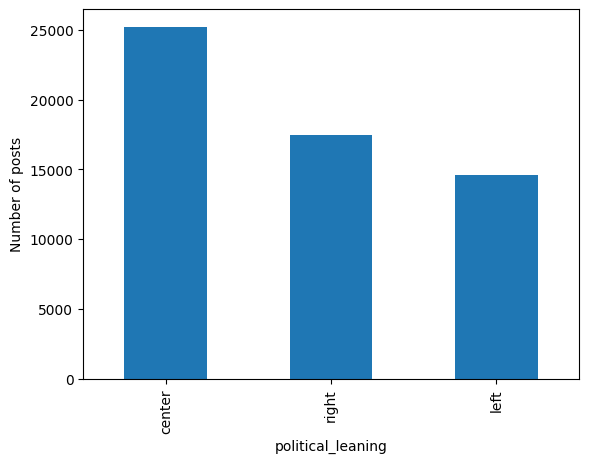

In [8]:
df_politics.value_counts('political_leaning').plot(kind='bar', fontsize=10, xlabel = "political_leaning", ylabel="Number of posts");

In [33]:
correlation = df_politics['political_leaning_id'].corr(df_politics['amount_of_cursewords'])
df_new = df_politics[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000              0.053978
amount_of_cursewords              0.053978              1.000000


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     126.7
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):           2.38e-29
Time:                          11:39:02   Log-Likelihood:                -51487.
No. Observations:                 45784   AIC:                         1.030e+05
Df Residuals:                     45782   BIC:                         1.030e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

### Taking a closer look at the data

In [142]:
# calculate where std 1-3 of the data is below
threesigma = df_politics['amount_of_cursewords'].quantile(0.997)
twosigma = df_politics['amount_of_cursewords'].quantile(0.95)
onesigma = df_politics['amount_of_cursewords'].quantile(0.68)
print(threesigma, twosigma, onesigma)

52.0 21.0 10.0


In [143]:
df_politics[df_politics['amount_of_cursewords'] >= 52]

,Unnamed: 0,username,post,political_leaning,cleaned_post,amount_of_cursewords,political_leaning_id
293,293,t2_yhe63e4,and Heydrich et al. 2: Its spelled Eichmann As...,center,heydrich et al spelled eichmann someone consid...,201,0
2338,2338,t2_6308kyoq,"pretty down right now, im dad u/repostsleuthbo...",center,pretty right im dad urepostsleuthbot yeah id l...,1252,0
2339,2339,t2_6308kyoq,cum cum cum cum cum cum cum cum cum cum cum cu...,center,cum cum cum cum cum cum cum cum cum cum cum cu...,769,0
7126,7126,t2_5wck8ax5,a toe tag. Oh yeah Amazing Amazing Wow Thanks ...,center,toe tag oh yeah amazing amazing wow thanks wow...,67,0
10007,10007,t2_udczs,the chance of it working is really low lol. Th...,right,chance working really low lol guy basically st...,52,1
...,...,...,...,...,...,...,...
47054,47054,t2_4oy6tqzq,he his helped senegal win U da goat Wtf ronny ...,center,helped senegal win u da goat wtf ronny watchin...,52,0
49370,49370,t2_70nq1e7t,(: Can i crush your balls 🥰😍😍😍🥵🥵🥵🥵🤤🤤🤤🤤🤤 Minecu...,right,crush ball minecum ruselessredcircle youre mom...,1195,1
49371,49371,t2_70nq1e7t,cum cum cum cum cum cum cum cum cum cum cum cu...,right,cum cum cum cum cum cum cum cum cum cum cum cu...,615,1
55327,55327,t2_14xq38,loses reproductive rights Irish joe at it agai...,left,loses reproductive right irish joe also checke...,55,-1


In [144]:
df_politics_cleaned = df_politics[df_politics['amount_of_cursewords'] <= 52]

There are 143662053 words in the combination of all review.
There are 121012981 words in the combination of all review.
There are 210426352 words in the combination of all review.


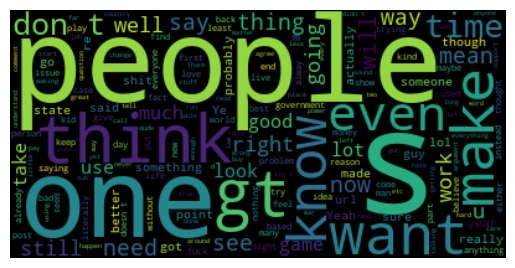

In [146]:
#Wordcloud en mooie plaatje:

df_right = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'right']
df_left = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'left']
df_centered = df_politics_cleaned[df_politics_cleaned['political_leaning'] == 'center']
right_text = " ".join(word for word in df_right.post)
print("There are {} words in the combination of all review.".format(len(right_text)))
left_text = " ".join(word for word in df_left.post)
print("There are {} words in the combination of all review.".format(len(left_text)))
centered_text = " ".join(word for word in df_centered.post)
print("There are {} words in the combination of all review.".format(len(centered_text)))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(right_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

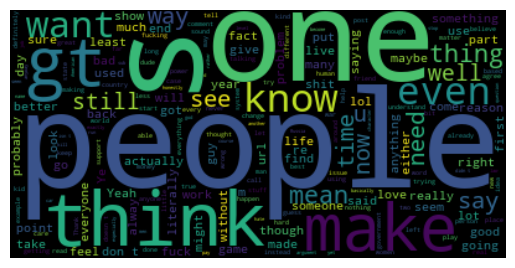

In [147]:
wordcloud = WordCloud().generate(left_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

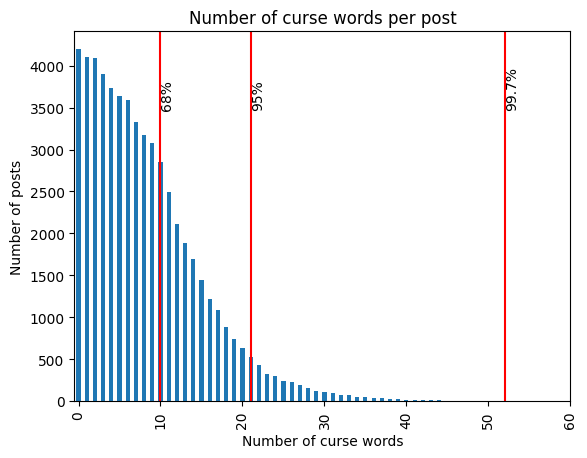

In [139]:
df_politics_cleaned.value_counts('amount_of_cursewords').plot(kind='bar', fontsize=10, xlabel = "Number of curse words", ylabel="Number of posts", title="Number of curse words per post", xticks=np.arange(0, 61, 10))

#plot the 1, 2, and 3 sigma lines
plt.axvline(x=onesigma, color='r', linestyle='-')
plt.axvline(x=twosigma, color='r', linestyle='-')
plt.axvline(x=threesigma, color='r', linestyle='-')

# annotate the 1, 2, and 3 sigma lines
plt.text(onesigma, 3500, '68%', rotation=90)
plt.text(twosigma, 3500, '95%', rotation=90)
plt.text(threesigma, 3500, '99.7%', rotation=90);

### Look at the correlation with 3σ of the data

In [128]:
correlation = df_politics_cleaned['political_leaning_id'].corr(df_politics_cleaned['amount_of_cursewords'])
df_new = df_politics_cleaned[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000             -0.010445
amount_of_cursewords             -0.010445              1.000000


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     2.973
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):             0.0846
Time:                          11:47:23   Log-Likelihood:                -44116.
No. Observations:                 39458   AIC:                         8.824e+04
Df Residuals:                     39456   BIC:                         8.825e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

at 3σ the amount of cursewords is not statistically relevant at p=0.05

### Look at the correlation with of 2σ of the data

In [130]:
df_politics_cleaned = df_politics[df_politics['amount_of_cursewords'] <= 21]

In [131]:
correlation = df_politics_cleaned['political_leaning_id'].corr(df_politics_cleaned['amount_of_cursewords'])
df_new = df_politics_cleaned[['political_leaning_id', 'amount_of_cursewords']].copy()
correlation_matrix = df_new.corr()
print(correlation_matrix)

                      political_leaning_id  amount_of_cursewords
political_leaning_id              1.000000             -0.013773
amount_of_cursewords             -0.013773              1.000000


In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df_new, test_size=0.2, random_state=42)

X = X_train['amount_of_cursewords']
Y = X_train['political_leaning_id']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
y_pred = results.predict(X).astype('int64')

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     political_leaning_id   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     11.90
Date:                  Thu, 21 Dec 2023   Prob (F-statistic):           0.000562
Time:                          12:06:40   Log-Likelihood:                -48943.
No. Observations:                 43524   AIC:                         9.789e+04
Df Residuals:                     43522   BIC:                         9.791e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

at 2σ the amount of cursewords is statistically relevant at p=0.05 and p=0.01